In [1]:
from qiskit import QuantumCircuit, Aer, IBMQ, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex

import numpy as np
%matplotlib inline

# Load IBM account
provider = IBMQ.load_account()

## Puertas cuánticas de 1 qubit

Se ilustra el comportamiento teórico de las puertas de Pauli X (o puerta NOT), Y y Z, cuyas matrices se definen como

$$X=\begin{pmatrix} 0 & 1\\ 1 & 0 \end{pmatrix}, \quad Y=\begin{pmatrix} 0 & -i\\ i & 0 \end{pmatrix}, \quad Z=\begin{pmatrix} 1 & 0\\ 0 & -1 \end{pmatrix}.$$

Se crea un circuito de medida con 1 qubit y 1 bit para hacer corresponder los qubits a los bits clásicos 0 y 1. Se añade esta medida a los circuitos creados para cada puerta de Pauli inicializadas en el qubit 0.

In [2]:
# Let's do a measurement circuit with 1 qubit and 1 bit
qc_m = QuantumCircuit(1, 1)
qc_m.measure([0], [0])

/tmp/ipykernel_38/3712920614.py:5: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qcX += qc_m
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


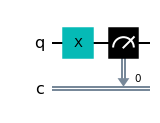

In [3]:
# Let's do an X-gate on a |0> qubit
qcX = QuantumCircuit(1)
qcX.x(0)

qcX += qc_m
qcX.draw('mpl')

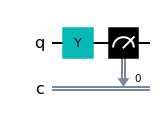

In [4]:
# Let's do an Y-gate on a |0> qubit
qcY = QuantumCircuit(1)
qcY.y(0)

qcY += qc_m
qcY.draw('mpl')

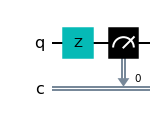

In [5]:
# Let's do an Z-gate on a |0> qubit
qcZ = QuantumCircuit(1)
qcZ.z(0)

qcZ += qc_m
qcZ.draw('mpl')

In [6]:
# Let's use Aer's qasm_simulator
qasm_simulator = Aer.get_backend('qasm_simulator')

# Execute the circuits X,Y and Z on the simulator
job_X = execute(qcX, qasm_simulator, shots=1024)
job_Y = execute(qcY, qasm_simulator, shots=1024)
job_Z = execute(qcZ, qasm_simulator, shots=1024)

# Grab the results from the job
result_X = job_X.result()
result_Y = job_Y.result()
result_Z = job_Z.result()

# Counts the results
counts_X = result_X.get_counts(qcX)
counts_Y = result_Y.get_counts(qcY)
counts_Z = result_Z.get_counts(qcZ)

Las salidas correspondientes para cada puerta de Pauli deben ser:

$$X|0\rangle=\begin{pmatrix} 0 & 1\\ 1 & 0 \end{pmatrix}\begin{pmatrix} 1\\ 0\end{pmatrix} = \begin{pmatrix}0\\ 1\end{pmatrix}=|1\rangle.$$

$$Y|0\rangle=\begin{pmatrix} 0 & -i\\ i & 0 \end{pmatrix}\begin{pmatrix} 1\\ 0\end{pmatrix} = \begin{pmatrix}0\\ i\end{pmatrix}=i|1\rangle.$$

$$Z|0\rangle=\begin{pmatrix} 1 & 0\\ 0 & -1 \end{pmatrix}\begin{pmatrix} 1\\ 0\end{pmatrix} = \begin{pmatrix}1\\ 0\end{pmatrix}=|1\rangle.$$

Es decir, se obtendrá el qubit $|1\rangle$ en las puertas X, Y y Z con probabilidad $|1|^2=1$, $|i|^2=1$ y $|1|^2=1$ respectivamente. 

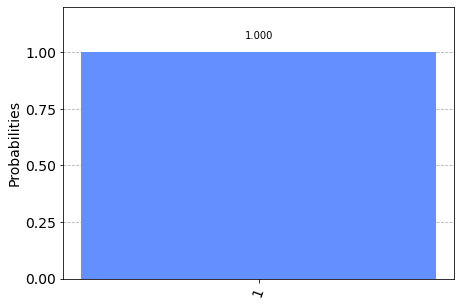

In [9]:
plot_histogram(counts_X)

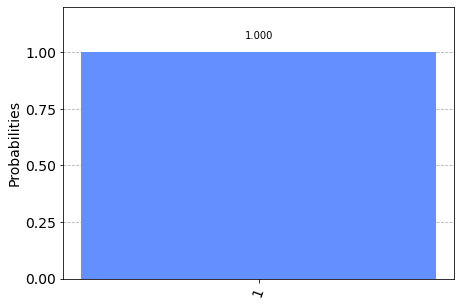

In [11]:
plot_histogram(counts_Y)

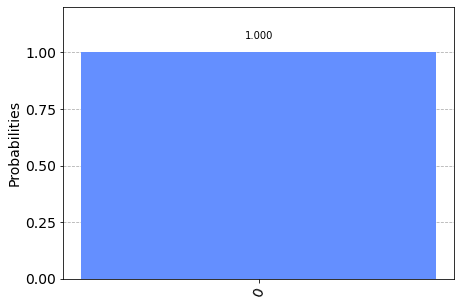

In [12]:
plot_histogram(counts_Z)

## Puertas cuánticas de 2 qubits

En este caso se prueba la puerta $C_X$ o CNOT, la cual opera sobre 2 qubits y aplica un NOT al qubit objetivo si el qubit de control toma el valor $|1\rangle$. En esta puerta consideramos que el qubit de control es $q_0$. 

La matriz que representa la puerta $C_X$ es

$$C_X=\begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\ 0 & 1 & 0 & 0\end{pmatrix}.$$

Se realizarán dos simulaciones, una con el qubit de control a $|0\rangle$ y otra con el qubit de control a $|1\rangle$, los resultados teóricos son los siguientes:

$$C_X|00\rangle=\begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\end{pmatrix}\begin{pmatrix}1\\0\\0\\0\end{pmatrix}=\begin{pmatrix}1\\0\\0\\0\end{pmatrix}=|00\rangle$$

y

$$C_X|10\rangle=\begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\end{pmatrix}\begin{pmatrix}0\\0\\1\\0\end{pmatrix}=\begin{pmatrix}0\\0\\0\\1\end{pmatrix}=|11\rangle.$$


In [10]:
qc_m = QuantumCircuit(2, 2)
qc_m.measure([0,1], [0,1])

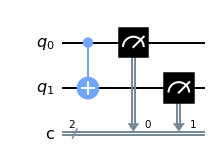

In [16]:
qcCX = QuantumCircuit(2)
qcCX.cx(0, 1)
qcCX += qc_m
qcCX.draw('mpl')

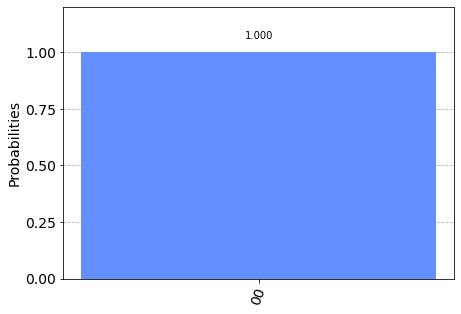

In [17]:
job_CX = execute(qcCX, qasm_simulator, shots=1024)
result_CX = job_CX.result()
counts_CX = result_CX.get_counts(qcCX)
plot_histogram(counts_CX)

Finalmente, probamos el resultado de la puerta Hadamard del enunciado. 

In [ ]:
qcH = QuantumCircuit(2)
qcH.h(0)
qcH += qc_m
qcH.draw('mpl')

In [ ]:
job_H = execute(qcH, qasm_simulator, shots=1024)
result_H = job_H.result()
counts_H = result_H.get_counts(qcH)
plot_histogram(counts_H)